<a href="https://colab.research.google.com/github/AnaliaLeyez/AnaliaLeyez/blob/main/EjemploProyectoCRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo CRISP-DM

##Docente: Mtr. Ing. Briant Alcides Gauna

####Lic en Ciencia de Datos - CCC

####Universidad del Gran Rosario - UGR


Dado el dataset Rice que contiene información de dos tipos de arroces (en archivo adjunto Citation_Request.txt se lo describe) , el cual se comparte en el siguiente link (también pueden encontrar archivo csv. adjunto):

https://docs.google.com/spreadsheets/d/e/2PACX-1vR2JTCQKzRmjSJBUvu7OOrcBceJcdVbyU1NMdzbThKKcEgiJQ55PH1AfpzQGvbAV1Om6uz-PsOrgn5i/pub?gid=521645460&single=true&output=csv



In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
files.upload()

Saving Rice_Cammeo_Osmancik - Rice_Cammeo_Osmancik.csv to Rice_Cammeo_Osmancik - Rice_Cammeo_Osmancik.csv


{'Rice_Cammeo_Osmancik - Rice_Cammeo_Osmancik.csv': b'Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class\r\n15231,525.5789795,229.7498779,85.09378815,0.9288820028,15617,0.5728955269,Cammeo\r\n14656,494.3110046,206.0200653,91.73097229,0.8954049945,15072,0.6154363155,Cammeo\r\n14634,501.1220093,214.106781,87.76828766,0.9121180773,14954,0.693258822,Cammeo\r\n13176,458.3429871,193.3373871,87.44839478,0.8918609023,13368,0.6406690478,Cammeo\r\n14688,507.1669922,211.7433777,89.31245422,0.9066908956,15262,0.6460239291,Cammeo\r\n13479,477.0159912,200.0530548,86.65029144,0.9013283253,13786,0.6578972936,Cammeo\r\n15757,509.2810059,207.2966766,98.33613586,0.8803234696,16150,0.5897080898,Cammeo\r\n16405,526.5700073,221.6125183,95.43670654,0.902520597,16837,0.6588882804,Cammeo\r\n14534,483.6409912,196.6508179,95.05068207,0.8754285574,14932,0.6496513486,Cammeo\r\n13485,471.5700073,198.272644,87.72728729,0.8967893124,13734,0.5723198652,Cammeo\r\n14930,499.9249878,

In [ ]:
datoscrudos = pd.read_csv("/content/Rice_Cammeo_Osmancik - Rice_Cammeo_Osmancik.csv")
datoscrudos

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [ ]:
#Renombrado de columnas
datoscrudos.rename({'Perimeter':'perimetro',
           'Area':'area',
           'Major_Axis_Length':'longitud_eje_mayor',
           'Minor_Axis_Length':'longitud_eje_menor',
           'Eccentricity':'excentricidad',
           'Convex_Area':'area_convexa',
           'Extent':'medida',
           'Class':'tipo'},
          axis=1, inplace=True)

#Revisión de los Datos

Realizar un análisis exploratorio de los datos, se deberá describir la información que considera relevante de los datos.

Como primera medida voy a revisar los datos, sus tipos, y si existen datos nulos que eliminar.

In [ ]:
#Voy a revisar la naturaleza de los datos

datoscrudos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                3810 non-null   int64  
 1   perimetro           3810 non-null   float64
 2   longitud_eje_mayor  3810 non-null   float64
 3   longitud_eje_menor  3810 non-null   float64
 4   excentricidad       3810 non-null   float64
 5   area_convexa        3810 non-null   int64  
 6   medida              3810 non-null   float64
 7   tipo                3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [ ]:
#Chequeo si hay valores nulos

datoscrudos.isnull().sum()

area                  0
perimetro             0
longitud_eje_mayor    0
longitud_eje_menor    0
excentricidad         0
area_convexa          0
medida                0
tipo                  0
dtype: int64

Como veo que no hay datos nulos, y que todas las variables son numéricas contínuas (salvo el tipo), continúo analizando de manera univariada.

#Análisis Univariado

Voy a realizar un análisis univariado de las distintas variables.

In [ ]:
#Analizo los datos de las columnas

datoscrudos.describe()

,area,perimetro,longitud_eje_mayor,longitud_eje_menor,excentricidad,area_convexa,medida
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [ ]:
variables={
    'area':'Área del Grano',
    'perimetro':'Perímetro del Grano',
    'longitud_eje_mayor':'Longitud del Eje Mayor del Grano',
    'longitud_eje_menor':'Longitud del Eje Menor del Grano',
    'excentricidad':'Excentricidad del Grano',
    'area_convexa':'Área Convexa del Grano',
    'medida':'Medida del Grano',
    'tipo':'Tipo de Grano'
}

In [ ]:
def generar_color_aleatorio():
    rojo = random.randint(0, 255)
    verde = random.randint(0, 255)
    azul = random.randint(0, 255)

    return f"#{rojo:02x}{verde:02x}{azul:02x}"

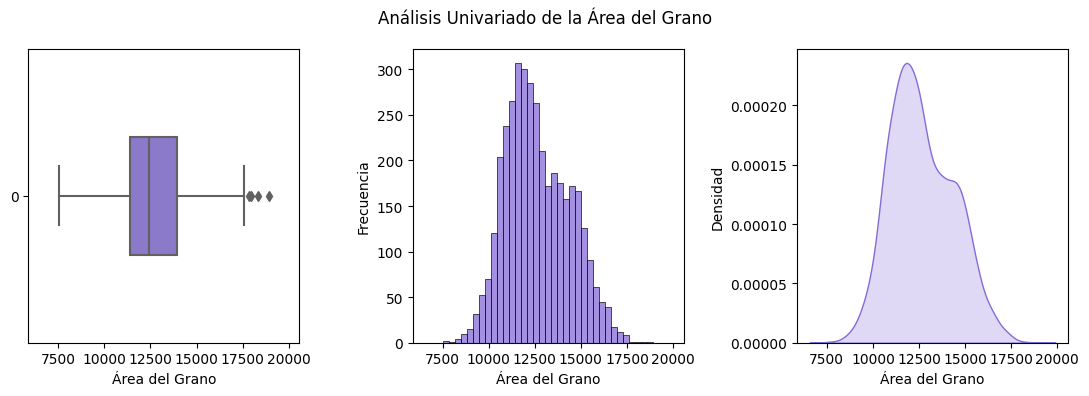

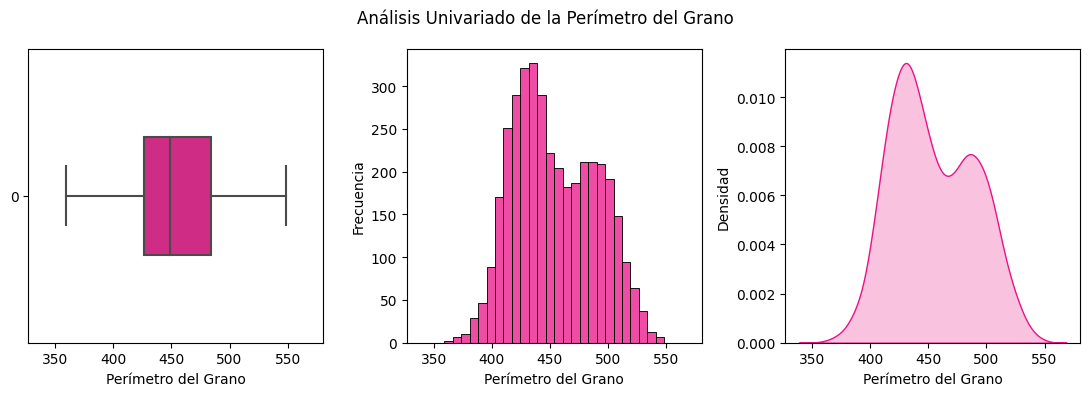

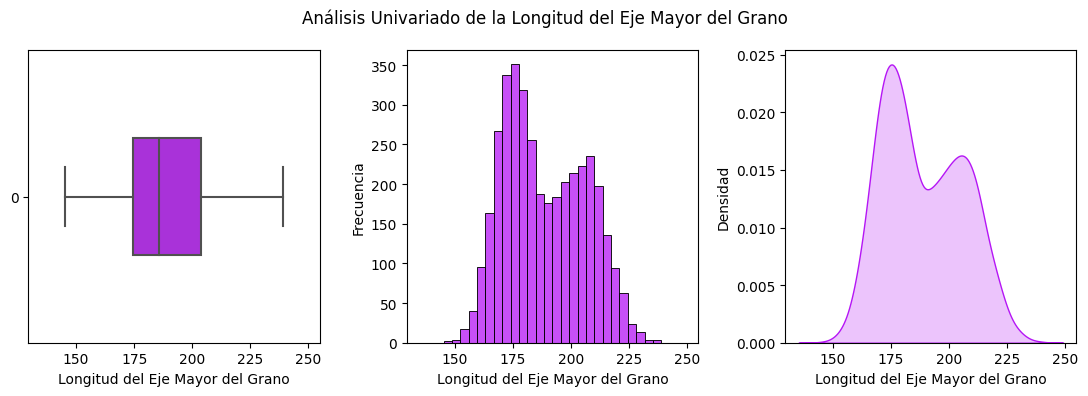

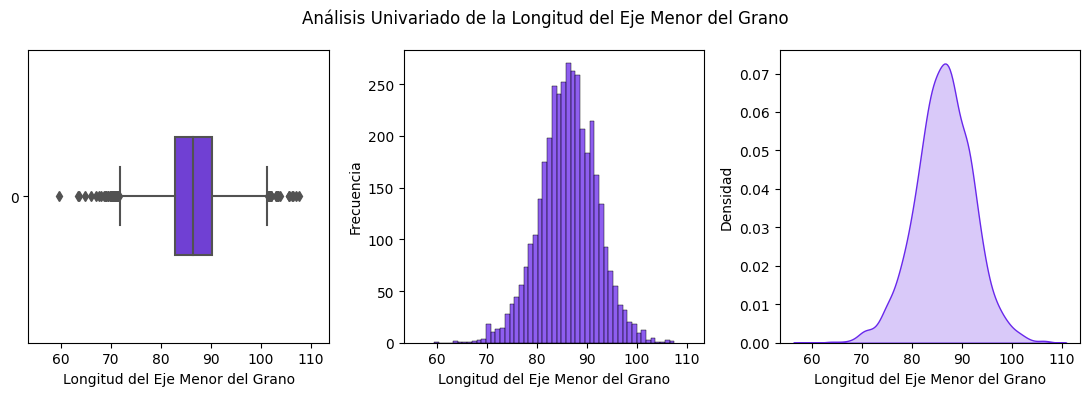

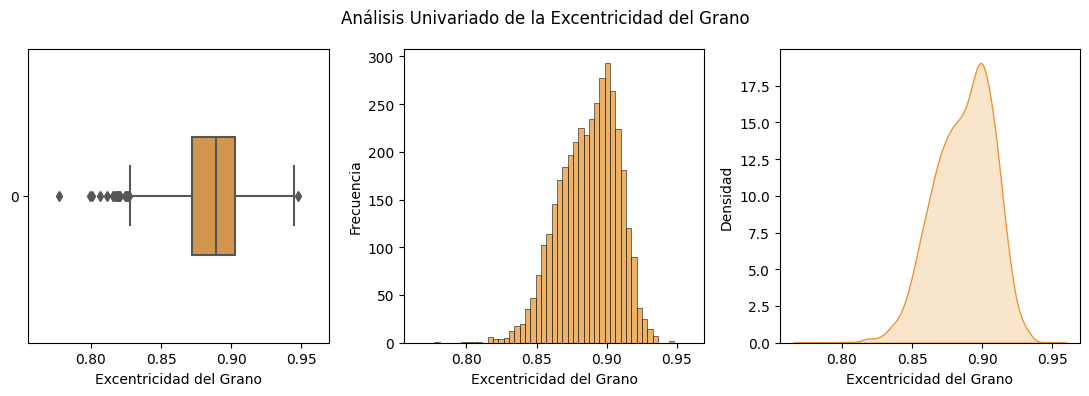

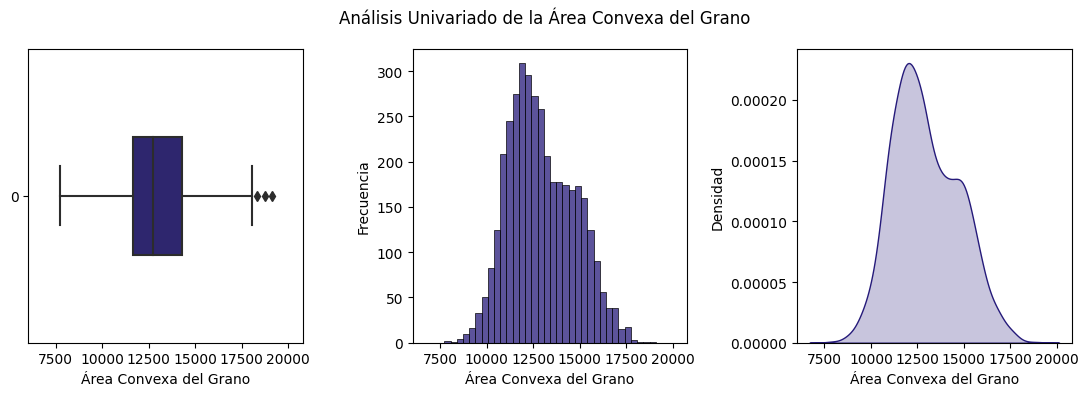

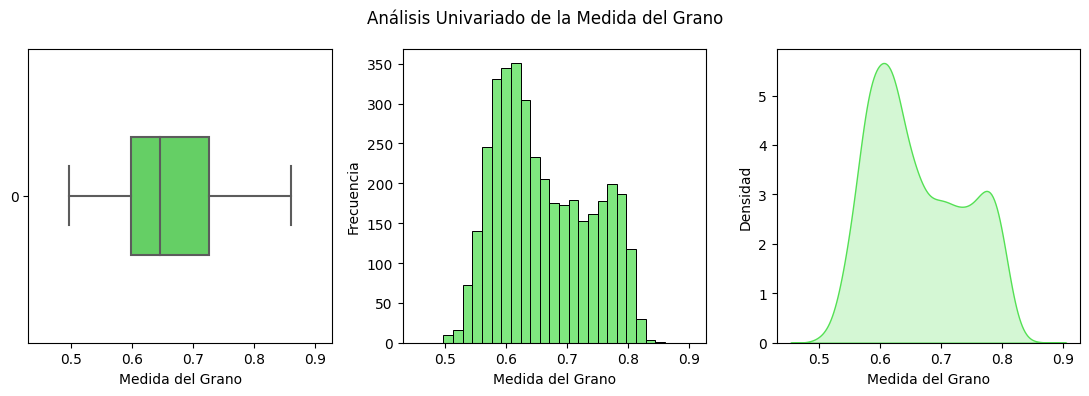

In [ ]:
for key,value in variables.items():
  if(key != 'tipo'):
    var = key
    var_title = value
    color_variable=generar_color_aleatorio()

    # Ajustes de la figura de Matplotlib
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

    # Plotea el boxplot
    sns.boxplot(data=datoscrudos[var], ax=ax[0], orient='h', width=0.4, color=color_variable)
    ax[0].set_xlabel(var_title)

    # Plotea el histograma
    sns.histplot(data=datoscrudos[var], ax=ax[1], kde=False, color=color_variable)
    ax[1].set_xlabel(var_title)
    ax[1].set_ylabel('Frecuencia')

    # Plotea la curva de densidad
    sns.kdeplot(data=datoscrudos[var], ax=ax[2], fill=True, color=color_variable)
    ax[2].set_xlabel(var_title)
    ax[2].set_ylabel('Densidad')

    fig.suptitle('Análisis Univariado de la ' + var_title)

    plt.tight_layout()

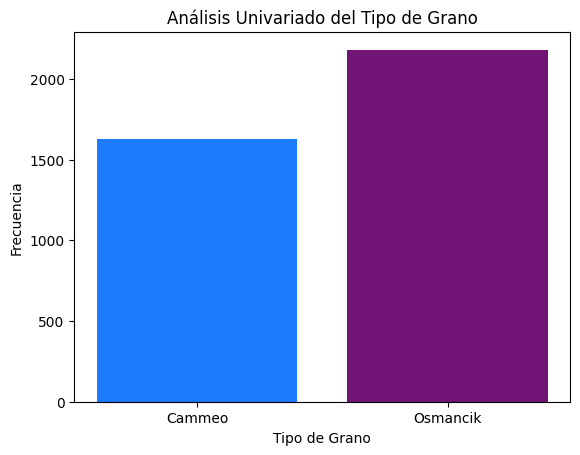

In [ ]:
frecuencias = datoscrudos["tipo"].value_counts()
categorias = ["Cammeo", "Osmancik"]
valores = []
for tipo in categorias:
  total=frecuencias[tipo]
  valores.append(total)

color_variable=generar_color_aleatorio()
color_variable2=generar_color_aleatorio()

# Gráfico
plt.bar(categorias, valores, color=[color_variable,color_variable2])
plt.xlabel("Tipo de Grano")
plt.ylabel("Frecuencia")
plt.title('Análisis Univariado del Tipo de Grano')
plt.show()


###Conclusiones extraídas de los Análisis Univariados

Generalidades: Se han procesado con éxito un total de 3810 elementos.

**Sobre la variable Área del Grano**

*   *Respecto a la Variabilidad Absoluta*: La variable Área del Grano toma los valores desde 7551 *(mínimo)* a 18913 *(máximo)*. El rango de la variable es de 11362.
*   *Respecto a la Distribución de los Datos*: El 25% de los valores son menores o iguales a 11370 *(Q1)*, el 50% de los valores son menores o iguales a 12421 *(Me)*, y el 75% de los valores son menores o iguales a 13950 *(Q3)*.
*   *Respecto a la Media y su Desvío*: El valor medio es de 12667, y su desvío es de 1732. La distribución tiene un sesgo hacia la derecha.
*   *Respecto a la Distribución de los datos*: Presenta una distribución bimodal, con un sesgo hacia la derecha. Posee algunos datos atípicos hacia la derecha.

**Sobre la variable Perímetro del Grano**

*   *Respecto a la Variabilidad Absoluta*: La variable Área del Grano toma los valores desde 359,1 a 548,4. El rango de la variable es de 189,3.
*   *Respecto a la Distribución de los Datos*: El 25% de los valores son menores o iguales a 426,1, el 50% de los valores son menores o iguales a 448,9, y el 75% de los valores son menores o iguales a 483,7.
*   *Respecto a la Media y su Desvío*: El valor medio es de 454,2, y su desvío es de 35,6. La distribución tiene un sesgo hacia la derecha.
*   *Respecto a la Distribución de los datos*: Presenta una distribución bimodal, con un sesgo hacia la derecha. No posee datos atípicos.


**Sobre la variable Longitud del Eje Mayor del Grano**

*   *Respecto a la Variabilidad Absoluta*: La variable Área del Grano toma los valores desde 145,3 a 239,0. El rango de la variable es de 93,7.
*   *Respecto a la Distribución de los Datos*: El 25% de los valores son menores o iguales a 174,4, el 50% de los valores son menores o iguales a 185,8 *(Me)*, y el 75% de los valores son menores o iguales a 203,6.
*   *Respecto a la Media y su Desvío*: El valor medio es de 188,8, y su desvío es de 17,4. La distribución tiene un sesgo hacia la derecha.
*   *Respecto a la Distribución de los datos*: Presenta una distribución bimodal, con un sesgo hacia la derecha. No presenta datos atípicos.

**Sobre la variable Longitud del Eje Menor del Grano**

*   *Respecto a la Variabilidad Absoluta*: La variable Área del Grano toma los valores desde 59,5 a 107,5. El rango de la variable es de 48.
*   *Respecto a la Distribución de los Datos*: El 25% de los valores son menores o iguales a 82,7, el 50% de los valores son menores o iguales a 86,4 *(Me)*, y el 75% de los valores son menores o iguales a 90,1 *(Q3)*.
*   *Respecto a la Media y su Desvío*: El valor medio es de 86,3, y su desvío es de 5,7. La distribución no presenta sesgo marcado.
*   *Respecto a la Distribución de los datos*: Presenta una distribución unimodal, si presenta sesgo, es hacia la izquierda. Posee algunos datos atípicos hacia ambos lados.

**Sobre la variable Excentricidad del Grano**

*   *Respecto a la Variabilidad Absoluta*: La variable Área del Grano toma los valores desde 0,777 a 0,948. El rango de la variable es de 0,171.
*   *Respecto a la Distribución de los Datos*: El 25% de los valores son menores o iguales a 0,872, el 50% de los valores son menores o iguales a 0,889 *(Me)*, y el 75% de los valores son menores o iguales a 0,903.
*   *Respecto a la Media y su Desvío*: El valor medio es de 0,887, y su desvío es de 0,021. La distribución no presenta un sesgo marcado.
*   *Respecto a la Distribución de los datos*: Presenta una distribución unimodal, si presenta sesgo, es hacia la izquierda. Posee algunos datos atípicos hacia ambos lados.

**Sobre la variable Área Convexa del Grano**

*   *Respecto a la Variabilidad Absoluta*: La variable Área del Grano toma los valores desde 7723 a 19099. El rango de la variable es de 11376.
*   *Respecto a la Distribución de los Datos*: El 25% de los valores son menores o iguales a 11626, el 50% de los valores son menores o iguales a 12706 *(Me)*, y el 75% de los valores son menores o iguales a 14284.
*   *Respecto a la Media y su Desvío*: El valor medio es de 12952, y su desvío es de 1777. La distribución tiene un sesgo hacia la derecha.
*   *Respecto a la Distribución de los datos*: Presenta una distribución bimodal, con un sesgo hacia la derecha. Posee algunos datos atípicos hacia la derecha.

**Sobre la variable Medida del Grano**

*   *Respecto a la Variabilidad Absoluta*: La variable Área del Grano toma los valores desde 0,497 a 0,861. El rango de la variable es de 0,364.
*   *Respecto a la Distribución de los Datos*: El 25% de los valores son menores o iguales a 0,599, el 50% de los valores son menores o iguales a 0,645 *(Me)*, y el 75% de los valores son menores o iguales a 0,727.
*   *Respecto a la Media y su Desvío*: El valor medio es de 0,662, y su desvío es de 0,077. La distribución tiene un sesgo hacia la derecha.
*   *Respecto a la Distribución de los datos*: Presenta una distribución bimodal (posiblemente trimodal), con un sesgo hacia la derecha. No posee algunos datos atípicos.



# Análisis Bivariado

Para iniciar el análisis bivariado, voy a analizar primero las variables numéricas entre sí, y luego cruzaré las variables numéricas con la variable categórica.

##Análisis Bivariado: Matriz de Correlaciones

<ipython-input-14-83f8c0191712>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlaciones = datoscrudos.corr()


<Axes: >

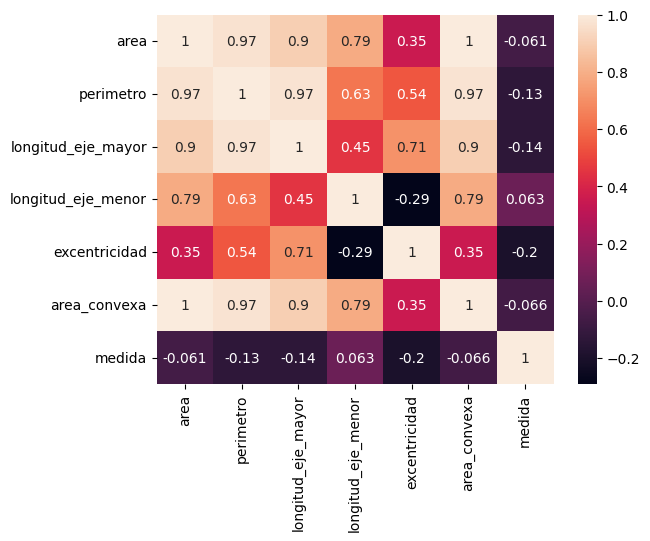

In [ ]:
# Matriz de correlaciones
matriz_correlaciones = datoscrudos.corr()

# Mapa de calor
sns.heatmap(matriz_correlaciones, annot=True)


In [ ]:
matriz_correlaciones

,area,perimetro,longitud_eje_mayor,longitud_eje_menor,excentricidad,area_convexa,medida
area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
perimetro,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
longitud_eje_mayor,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
longitud_eje_menor,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
excentricidad,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
area_convexa,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
medida,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


Escribiendo de otra manera la tabla de Correlaciones:

|Variable 1|Variable 2|Coeficiente de Correlación|Clasificación|Decisión|
|---|---|---|---|---|
| area | perímetro |0.966453|Correlación alta|Eliminar una de las 2|
|      |longitud_eje_mayor|0.903015|Correlación alta|Eliminar una de las 2|
|      |longitud_eje_menor|0.787840|Correlación moderada||
|      |excentricidad	|0.352095|Correlación baja||
|      |area_convexa|0.998939|Correlación alta|Eliminar una de las 2|
|      |extent|-0.061184|Correlación nula||
|perímetro|longitud_eje_mayor|0.971884|Correlación alta|Eliminar una de las 2|
|         |longitud_eje_menor|0.629828|Correlación moderada||
|         |excentricidad|0.544601|Correlación ligera||
|         |area_convexa|0.969937|Correlación alta|Eliminar una de las 2|
|         |extent|-0.130923|Correlación nula||
|longitud_eje_mayor|longitud_eje_menor|0.452092|Correlación ligera||
|                  |excentricidad|0.710897|Correlación moderada||
|                  |area_convexa|0.903381|Correlación alta|Eliminar una de las 2|
|                  |extent|-0.139562|Correlación nula||
|longitud_eje_menor|excentricidad|-0.291683|Correlación baja||
|                  |area_convexa|0.787318|Correlación moderada||
|                  |extent|0.063366|Correlación nula||
|excentricidad|area_convexa|0.352716|Correlación baja||
|             |extent|-0.198580|Correlación nula||
|area_convexa|extent|-0.065826|Correlación nula||

Resumiendo:

|Variable 1|Variable 2|Decisión|
|---|---|---|
| area |**perímetro**|Eliminar Perímetro|
|      |**longitud_eje_mayor**|Eliminar Longitud de Eje Mayor|
|      |**area_convexa**|Eliminar Área Convexa|
|**perímetro**|**longitud_eje_mayor**|Eliminar Ambas|
|         |**area_convexa**|Eliminar Ambas|
|**longitud_eje_mayor**|**area_convexa**|Eliminar Ambas|

A partir de estas decisiones, reducimos de 8 variables (7 cuantitativas y 1 cualitativa) a 5 variables (4 cuantitativas y 1 cualitativa).

Ahora se realizará un análisis bivariado a partir de las variables clasificadas.

In [ ]:
variables_filtradas={
    'area':'Área del Grano',
    'longitud_eje_menor':'Longitud del Eje Menor del Grano',
    'excentricidad':'Excentricidad del Grano',
    'medida':'Medida del Grano',
    'tipo':'Tipo de Grano'
}

In [ ]:
datos_filtrados=datoscrudos[['area','longitud_eje_menor','excentricidad','medida','tipo']]
datos_filtrados

,area,longitud_eje_menor,excentricidad,medida,tipo
0,15231,85.093788,0.928882,0.572896,Cammeo
1,14656,91.730972,0.895405,0.615436,Cammeo
2,14634,87.768288,0.912118,0.693259,Cammeo
3,13176,87.448395,0.891861,0.640669,Cammeo
4,14688,89.312454,0.906691,0.646024,Cammeo
...,...,...,...,...,...
3805,11441,85.756592,0.864280,0.681012,Osmancik
3806,11625,89.462570,0.845850,0.694279,Osmancik
3807,12437,86.801979,0.881144,0.626739,Osmancik
3808,9882,78.210480,0.874406,0.659064,Osmancik


##Análisis Bivariado: Clasificación de las Muestras

Ahora voy a volver a revisar las distribuciones de las variables pero enfrentándolas contra la variable categórica **Tipo de Grano**.

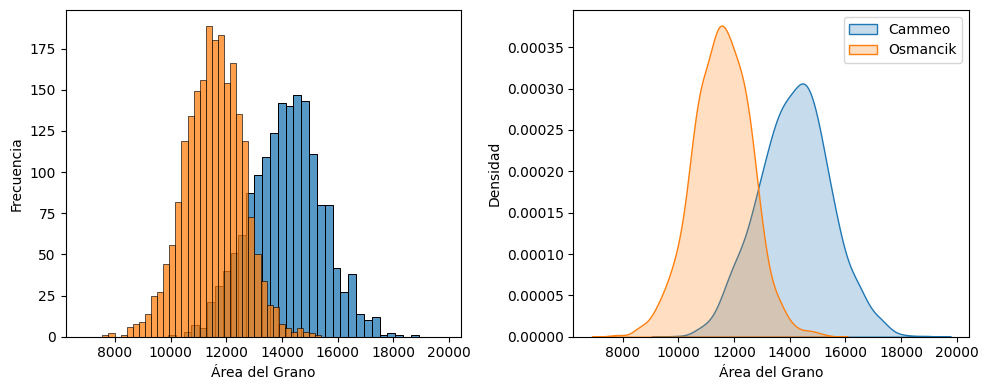

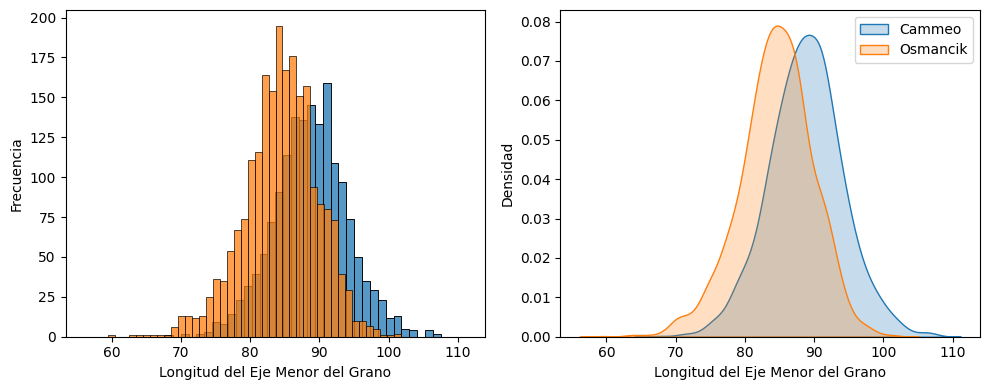

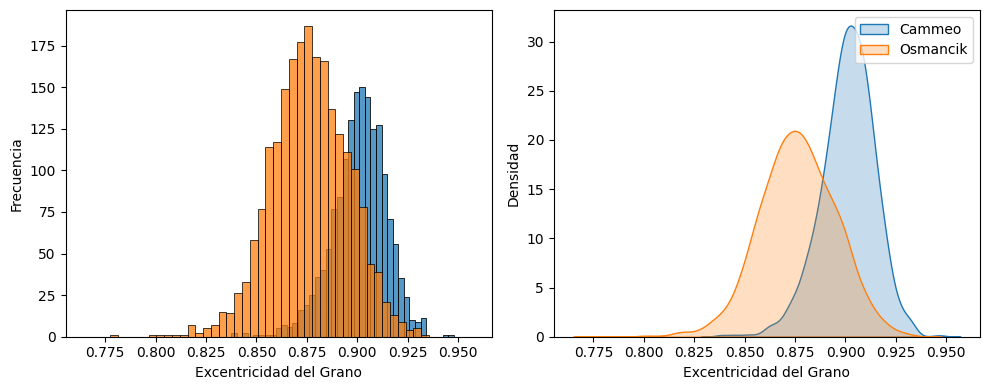

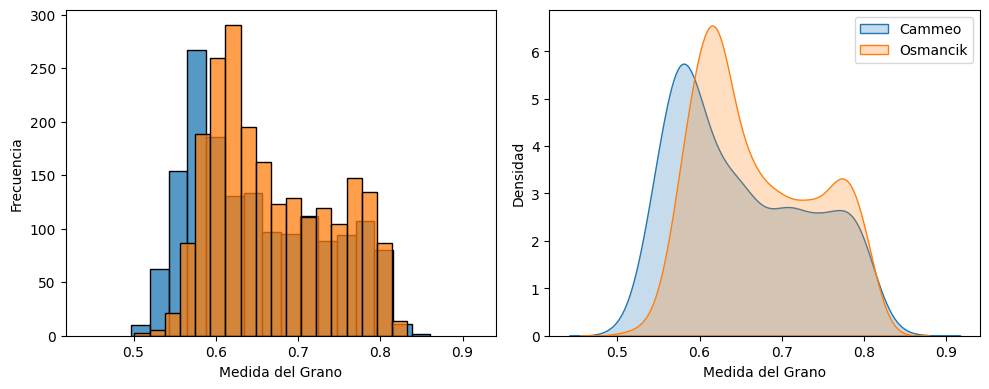

In [ ]:
for key,value in variables_filtradas.items():
  if(key != 'tipo'):
    var = key
    var_title = value
    color_variable=generar_color_aleatorio()

    # Ajustes de la figura de Matplotlib
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

    # Histograma para cada especie
    for tipo in categorias:
      sns.histplot(data=datos_filtrados.loc[(datos_filtrados['tipo'] == tipo)], x=var, label=tipo, kde=False, ax=ax[0])
    ax[0].set_xlabel(var_title)
    ax[0].set_ylabel('Frecuencia')

    # Curva de densidad para cada especie
    for tipo in categorias:
      sns.kdeplot(data=datos_filtrados.loc[(datos_filtrados['tipo'] == tipo)], x=var, label=tipo, fill=True, ax=ax[1])
    ax[1].set_xlabel(var_title)
    ax[1].set_ylabel('Densidad')
    ax[1].legend()

    plt.tight_layout()

# Análisis Multivariado

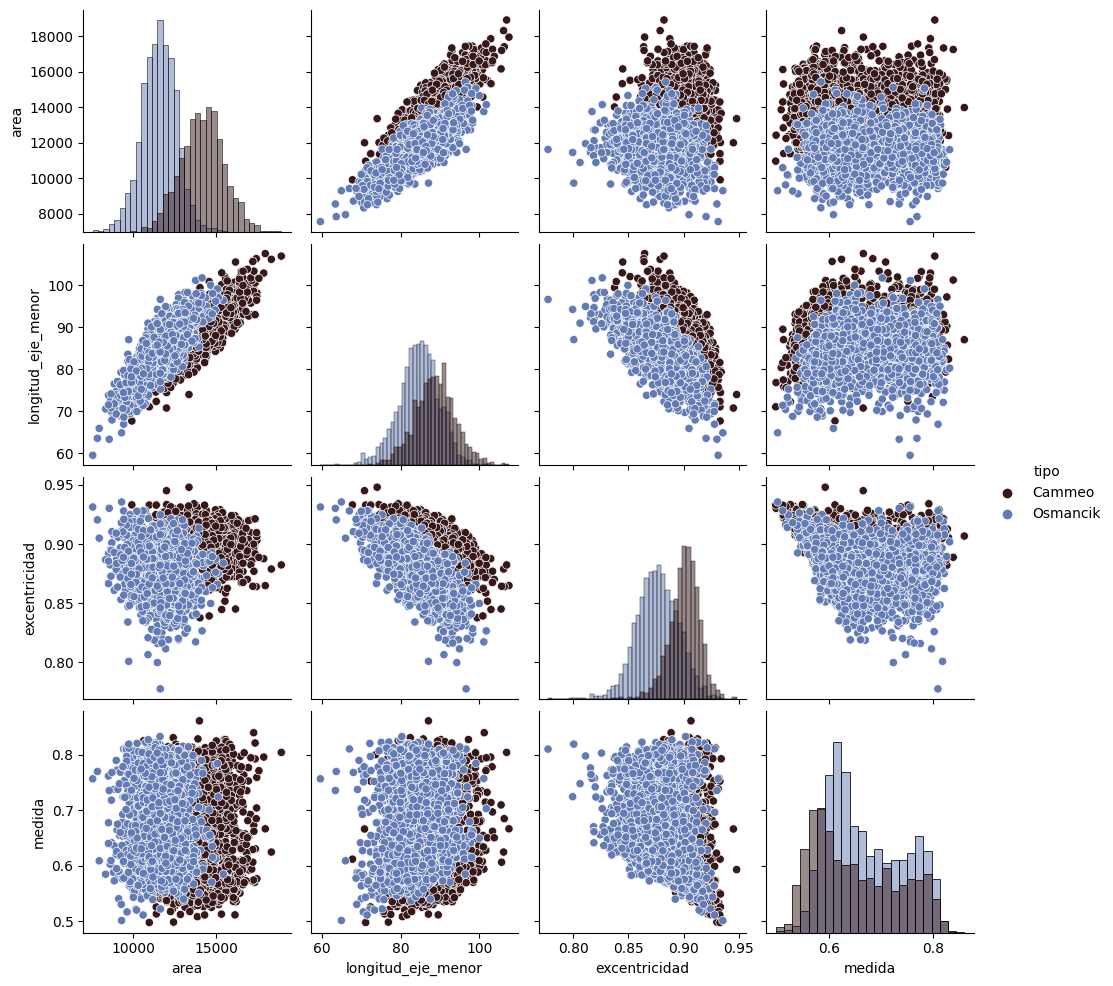

In [ ]:
color_variable=generar_color_aleatorio()
color_variable2=generar_color_aleatorio()
sns.pairplot(datos_filtrados, hue="tipo", diag_kind="hist",palette=[color_variable,color_variable2])

Como se ve en el cruce de variables, la variable Medidas (extent) no es una variable efectiva para poder clasificar, ya que los elementos se solapan cuando se cruza con Longitud de Eje Menor y Excentricidad. Además, en el análisis bivariado, las distribuciones están altamente solapadas. Por lo tanto, se retirará la variable de Medidas (extent).

# Aplicación del Modelo Supervisado



A partir de ahora, revisamos las variables que vamos a trabajar:

```
variables_modelo={
    'area':'Área del Grano',
    'longitud_eje_menor':'Longitud del Eje Menor del Grano',
    'excentricidad':'Excentricidad del Grano',
    'tipo':'Tipo de Grano'
}
```

La función de clasificación se puede representar de la siguiente manera:

**tipo = f(area, longitud_eje_menor, excentricidad)**

Variables Independientes:


*   **Área del Grano**
*   **Longitud del Eje Menor del Grano**
*   **Excentricidad**

Variable Dependiente (etiqueta): **Tipo de Grano**

In [ ]:
variables_modelo={
    'area':'Área del Grano',
    'longitud_eje_menor':'Longitud del Eje Menor del Grano',
    'excentricidad':'Excentricidad del Grano',
    'tipo':'Tipo de Grano'
}

In [ ]:
var=[]
for key,value in variables_modelo.items():
  var.append(key)
datos_modelo=datos_filtrados[var]
datos_modelo

,area,longitud_eje_menor,excentricidad,tipo
0,15231,85.093788,0.928882,Cammeo
1,14656,91.730972,0.895405,Cammeo
2,14634,87.768288,0.912118,Cammeo
3,13176,87.448395,0.891861,Cammeo
4,14688,89.312454,0.906691,Cammeo
...,...,...,...,...
3805,11441,85.756592,0.864280,Osmancik
3806,11625,89.462570,0.845850,Osmancik
3807,12437,86.801979,0.881144,Osmancik
3808,9882,78.210480,0.874406,Osmancik


#Entrenamientos del Modelo


Acá, voy a clasificar los datos que voy a usar, en Datos para el Entrenamiento y Datos para la Verificación.

In [ ]:
var_data=[]
target=[]
for key,value in variables_modelo.items():
  if (key!='tipo'):
    var_data.append(key)
  else:
    target.append(key)
datos_vi=datos_filtrados[var_data]
datos_vd=datos_filtrados[target]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_vi, datos_vd, test_size=0.2)

##Método 1: Método de los Vecinos más Cercanos (kNN)

In [ ]:
modelos_vecinos=range(3,17)
scoring_modelos=[]

for cantidad_vecinos in modelos_vecinos:

  # Crear un objeto KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=cantidad_vecinos)

  # Entrenar el modelo
  knn.fit(X_train, y_train)

  # Predecir las etiquetas de los datos de prueba
  y_pred = knn.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  scoring_modelos.append(accuracy)
  conf_matrix = confusion_matrix(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)

  print(f'Modelo de {cantidad_vecinos} vecinos cercanos')
  print(f'Precisión del modelo: {accuracy}')
  print('Matriz de Confusión:')
  print(conf_matrix)
  print('Informe de Clasificación:')
  print(classification_rep)

  print("--------")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo de 3 vecinos cercanos
Precisión del modelo: 0.9146981627296588
Matriz de Confusión:
[[288  38]
 [ 27 409]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.91      0.88      0.90       326
    Osmancik       0.91      0.94      0.93       436

    accuracy                           0.91       762
   macro avg       0.91      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762

--------
Modelo de 4 vecinos cercanos
Precisión del modelo: 0.9146981627296588
Matriz de Confusión:
[[296  30]
 [ 35 401]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.89      0.91      0.90       326
    Osmancik       0.93      0.92      0.93       436

    accuracy                           0.91       762
   macro avg       0.91      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762

--------
Modelo de 5 vecinos cercanos
Precisión del model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo de 7 vecinos cercanos
Precisión del modelo: 0.905511811023622
Matriz de Confusión:
[[279  47]
 [ 25 411]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.92      0.86      0.89       326
    Osmancik       0.90      0.94      0.92       436

    accuracy                           0.91       762
   macro avg       0.91      0.90      0.90       762
weighted avg       0.91      0.91      0.91       762

--------
Modelo de 8 vecinos cercanos
Precisión del modelo: 0.9015748031496063
Matriz de Confusión:
[[283  43]
 [ 32 404]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.90      0.87      0.88       326
    Osmancik       0.90      0.93      0.92       436

    accuracy                           0.90       762
   macro avg       0.90      0.90      0.90       762
weighted avg       0.90      0.90      0.90       762

--------
Modelo de 9 vecinos cercanos
Precisión del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo de 10 vecinos cercanos
Precisión del modelo: 0.9028871391076115
Matriz de Confusión:
[[280  46]
 [ 28 408]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.91      0.86      0.88       326
    Osmancik       0.90      0.94      0.92       436

    accuracy                           0.90       762
   macro avg       0.90      0.90      0.90       762
weighted avg       0.90      0.90      0.90       762

--------
Modelo de 11 vecinos cercanos
Precisión del modelo: 0.8910761154855643
Matriz de Confusión:
[[270  56]
 [ 27 409]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.91      0.83      0.87       326
    Osmancik       0.88      0.94      0.91       436

    accuracy                           0.89       762
   macro avg       0.89      0.88      0.89       762
weighted avg       0.89      0.89      0.89       762

--------
Modelo de 12 vecinos cercanos
Precisión del mo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modelo de 13 vecinos cercanos
Precisión del modelo: 0.89501312335958
Matriz de Confusión:
[[270  56]
 [ 24 412]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.92      0.83      0.87       326
    Osmancik       0.88      0.94      0.91       436

    accuracy                           0.90       762
   macro avg       0.90      0.89      0.89       762
weighted avg       0.90      0.90      0.89       762

--------
Modelo de 14 vecinos cercanos
Precisión del modelo: 0.889763779527559
Matriz de Confusión:
[[272  54]
 [ 30 406]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.90      0.83      0.87       326
    Osmancik       0.88      0.93      0.91       436

    accuracy                           0.89       762
   macro avg       0.89      0.88      0.89       762
weighted avg       0.89      0.89      0.89       762

--------
Modelo de 15 vecinos cercanos
Precisión del model

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# Encontrar el máximo
max_value = np.max(scoring_modelos)

i=0
for score in scoring_modelos:
  if (score == max_value):
    mejor_modelo_knn = modelos_vecinos[i]
  i=i+1

print(f'El mejor modelo de vecinos más cercanos es el de {mejor_modelo_knn} vecinos, con un scoring de {round(max_value,4)*100}%.')

El mejor modelo de vecinos más cercanos es el de 4 vecinos, con un scoring de 91.47%.


##Método 2: Árboles de Decisión

In [ ]:
# Entrenamiento del Modelo

for profundidad in range(1,6):
  arbol_decision = DecisionTreeClassifier(max_depth=profundidad)
  arbol_decision.fit(X_train, y_train)

  # Calculamos la precisión del modelo.
  y_pred = arbol_decision.predict(X_test)

  #Revisamos el Scoring y la Matriz de Confusión
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)

  print(f"Profundidad del Árbol de Decisión: {profundidad} niveles")
  print(f'Precisión del modelo: {accuracy} ---> {round(accuracy,4)*100}%')
  print('Matriz de Confusión:')
  print(conf_matrix)
  print('Informe de Clasificación:')
  print(classification_rep)
  print()
  print("------")
  print()
  print()

Profundidad del Árbol de Decisión: 1 niveles
Precisión del modelo: 0.8871391076115486 ---> 88.71%
Matriz de Confusión:
[[261  65]
 [ 21 415]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.93      0.80      0.86       326
    Osmancik       0.86      0.95      0.91       436

    accuracy                           0.89       762
   macro avg       0.90      0.88      0.88       762
weighted avg       0.89      0.89      0.89       762


------


Profundidad del Árbol de Decisión: 2 niveles
Precisión del modelo: 0.8818897637795275 ---> 88.19%
Matriz de Confusión:
[[245  81]
 [  9 427]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.96      0.75      0.84       326
    Osmancik       0.84      0.98      0.90       436

    accuracy                           0.88       762
   macro avg       0.90      0.87      0.87       762
weighted avg       0.89      0.88      0.88       762



Profundidad del Árbol de Decisión: 3 niveles
Precisión del modelo: 0.9251968503937008 ---> 92.52%
Matriz de Confusión:
[[303  23]
 [ 34 402]]
Informe de Clasificación:
              precision    recall  f1-score   support

      Cammeo       0.90      0.93      0.91       326
    Osmancik       0.95      0.92      0.93       436

    accuracy                           0.93       762
   macro avg       0.92      0.93      0.92       762
weighted avg       0.93      0.93      0.93       762

------




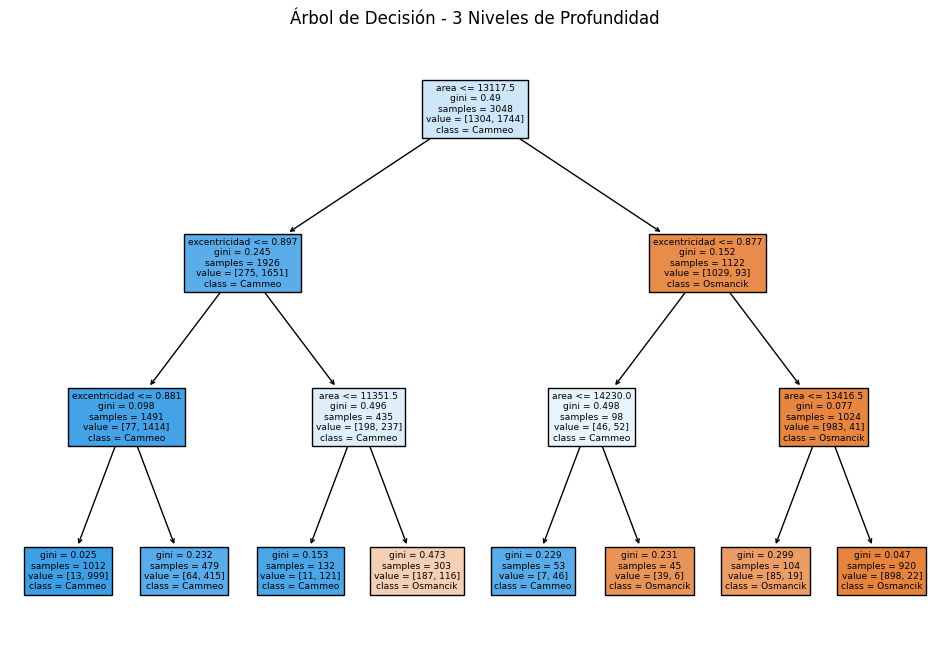

In [ ]:
# Ploteamos el árbol de decisión, utilizamos la profundidad 3 para ver bien el desarrollo del arbol

# Entrenamiento del Modelo
arbol_decision = DecisionTreeClassifier(max_depth=3)
arbol_decision.fit(X_train, y_train)

# Calculamos la precisión del modelo.
y_pred = arbol_decision.predict(X_test)

#Revisamos el Scoring y la Matriz de Confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Profundidad del Árbol de Decisión: 3 niveles")
print(f'Precisión del modelo: {accuracy} ---> {round(accuracy,4)*100}%')
print('Matriz de Confusión:')
print(conf_matrix)
print('Informe de Clasificación:')
print(classification_rep)
print("------")
print()
print()


plt.figure(figsize=(12, 8))
plot_tree(arbol_decision, filled=True, feature_names=X_train.columns, class_names=['Osmancik', 'Cammeo'])
plt.title("Árbol de Decisión - 3 Niveles de Profundidad")
plt.show()

#Comparación e Interpretación de los Resultados



A partir de los Análisis realizados, se han escogidos los modelos KNN con 5 vecinos más cercanos y Árboles de Decisión con una profundidad de 3 niveles.

|Modelo|Características|Eficiencia|
|---|---|---|
|Vecinos más cercanos|k=5|90.55%|
|Árboles de decisión|profundidad=3|91.73%|


Entre ambos modelos, como vemos, el modelo de árboles con solo 3 decisiones, mejora y supera el scoring de kNN, por lo que considero que el Modelo de Árbol de Decisión con una profundidad de 3 niveles es un óptimo modelo para poder clasificar los granos.